## Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:
- What is the percentage of protected vs unprotected species?
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- What park has the biggest number of observations of species in protection?

- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?
- How many species are in each conservation status?
- What is their distribution by category?
- How many species are considered protected?

- How many observations by park are there? 

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. The data for this project is inspired by real data, but is mostly fictional.

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- `category` - the category of taxonomy for each species
- `scientific_name` - the scientific name of each species
- `common_names` - the common names of each species
- `conservation_status` - the species conservation status
In most cases coming across `nan` values must be treated carefully, but the absence of data here means that these species are not under any conservation status.

The `observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- `scientific_name` - the scientific name of each species
- `park_name` - the name of the national park
- `observations` - the number of observations in the past 7 days

### Explore & Clean Data

In [83]:
# Import the libraries
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [107]:
# Set color pallete for Seaborn visualizations
sns.set_palette("Set2")
sns.set_style("whitegrid")
sns.set_context("notebook")

In [3]:
# Load in the dataset and get a preview
species = pd.read_csv("species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
# Load in the dataset and get a preview
observations = pd.read_csv("observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
# Get data characteristics
print(f"Species shape: {species.shape}")
print(f"Observations shape: {observations.shape}")

Species shape: (5824, 4)
Observations shape: (23296, 3)


In [6]:
# See if there are any duplicates in Species
species[species.duplicated(subset=["scientific_name"])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [7]:
# Check a specific example
species[species.scientific_name == "Puma concolor"]

,category,scientific_name,common_names,conservation_status
16,Mammal,Puma concolor,Panther (Mountain Lion),NaN
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
4451,Mammal,Puma concolor,Mountain Lion,NaN


In [8]:
# Drop the duplicates in Species
species.drop_duplicates(subset=["scientific_name"], keep="last", inplace=True)
# Check the difference
print(f"Species shape: {species.shape}")

Species shape: (5541, 4)


In [9]:
# See if there are any total duplicates in Species Observations
observations[observations.duplicated(subset=["scientific_name", "park_name"])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [10]:
# Calculate the total number for duplicate records
observations["total"] = observations.groupby(["scientific_name", "park_name"])["observations"].transform("sum")
# Drop the duplicates
observations.drop_duplicates(subset=["scientific_name", "park_name"], keep="last", inplace=True)
# Drop the observation column
observations = observations[["scientific_name", "park_name", "total"]]
# Rename the column back to observation for better representation
observations = observations.rename(columns={"total": "observations"})
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [11]:
# Check the difference
print(f"Species shape: {observations.shape}")

Species shape: (22164, 3)


#### Species Dataset

In [76]:
# Get unique categories of species
print(f"Unique categories: {species.category.nunique()}")
species_count = species.category.value_counts()

Unique categories: 7


Vascular Plant       4262
Bird                  488
Nonvascular Plant     333
Mammal                176
Fish                  125
Amphibian              79
Reptile                78
Name: category, dtype: int64

In [104]:
# Fill in NaN values with a new status
species.fillna('No Intervention', inplace=True)
# Get unique conservation status groups
print(f"Unique conservation statuses: {species.conservation_status.nunique()}")
species_count = species.conservation_status.value_counts()
species_count

Unique conservation statuses: 5


No Intervention       5362
Species of Concern     151
Endangered              15
Threatened              10
In Recovery              3
Name: conservation_status, dtype: int64

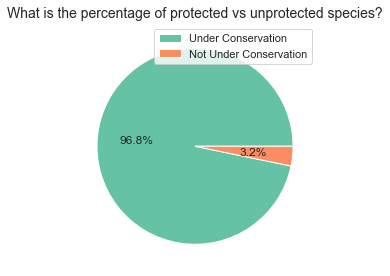

In [119]:
# Calculate the percentage of conserved & non-conserved cases
non_conserved_pct = (species_count.sum() - 5362)/species_count.sum()
conserved_pct = 5362/species_count.sum()

# Get the difference in a pie chart

ax = plt.pie([conserved_pct, non_conserved_pct], autopct="%0.1f%%")
plt.title("What is the percentage of protected vs unprotected species?", fontsize=14)
plt.legend(["Under Conservation", "Not Under Conservation"])
plt.tight_layout()

#### Observations Dataset

In [14]:
# Get distinct park names
print(f"Number of parks: {observations.park_name.nunique()}")
print(f"Unique parks: {observations.park_name.unique()}")

Number of parks: 4
Unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [15]:
print(f"Total number of observations: {observations.observations.sum()}")

Total number of observations: 3314739


#### Merge Datatables

In [16]:
# Merge data for future investigation and visualizations
full_data = pd.merge(observations, species, how="left")
full_data = full_data[["scientific_name", "park_name", "observations", "category", "conservation_status"]]
full_data

,scientific_name,park_name,observations,category,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,No Intervention
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,No Intervention
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,No Intervention
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,No Intervention
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,No Intervention
...,...,...,...,...,...
22159,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,No Intervention
22160,Otospermophilus beecheyi,Bryce National Park,130,Mammal,No Intervention
22161,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,No Intervention
22162,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,No Intervention


### Analyze Data
This section will begin analyzing the data after the initial exploration. First, we'll explore the `conservation_status` variable in more deep. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range
- `No Intervention`: renamed `nan` values, are not under any conservation status

In [18]:
# Get the distribution of Conservation Status VS Category
conservation_category = full_data[full_data.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,4.0,16.0,12.0,24.0,NaN,NaN,4.0
In Recovery,NaN,12.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,16.0,272.0,16.0,88.0,20.0,20.0,172.0
Threatened,8.0,NaN,16.0,8.0,NaN,NaN,8.0


In [19]:
#conservation_category = pd.crosstab(full_data.conservation_status, full_data.category)
#conservation_category = conservation_category.drop("No Intervention")
#conservation_category

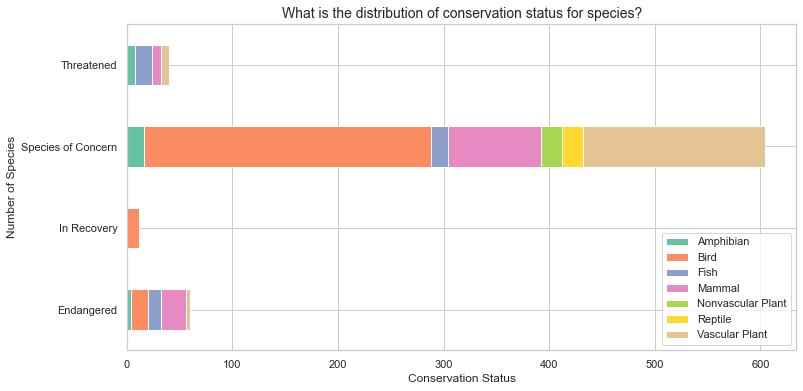

In [123]:
# Get the distribution of conservation status within different categories
ax = conservation_category.plot.barh(figsize=(12,6), stacked=True)
plt.title("What is the distribution of conservation status for species?", fontsize=14)
ax.set_xlabel("Conservation Status", fontsize=12)
ax.set_ylabel("Number of Species", fontsize=12)
plt.legend()

In [86]:
# Add a new column of boolean type for any species that had a value other than No Intervention
full_data["is_protected"] = full_data.conservation_status != "No Intervention"
# Get the distribution of Category VS Protection Status
protection_status = full_data.groupby(["category", "is_protected"])\
                        ["scientific_name"].nunique().reset_index()\
                        .pivot(columns="is_protected", index="category", values="scientific_name").reset_index()
# Drop the unnessecary is_protected column
protection_status.columns = ["category", "not_protected", "protected"]
# Calculate the rate of protection that each category exhibits
protection_status["percent_protected"] = protection_status.protected / (protection_status.protected + protection_status.not_protected) * 100
protection_status

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,114,11,8.800000
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Text(0, 0.5, 'Protection Percantage')

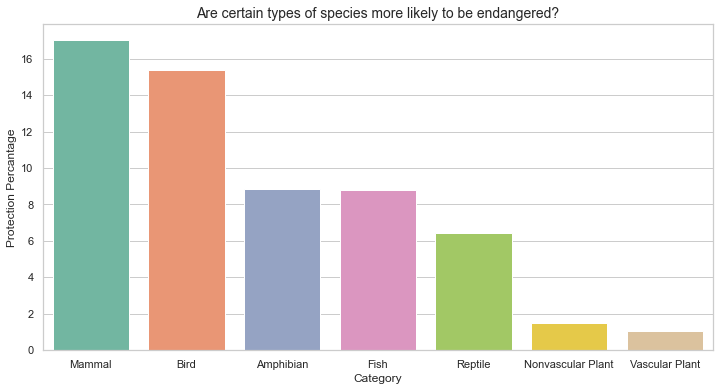

In [60]:
# Get the percantage ditribution of protection within different categories
plt.figure(figsize=(12,6))
ax = sns.barplot(data=protection_status, x="category", y="percent_protected", order=protection_status.sort_values("percent_protected", ascending=False).category)
plt.title("Are certain types of species more likely to be endangered?", fontsize=14)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Protection Percantage", fontsize=12)

Text(0, 0.5, 'Obervations')

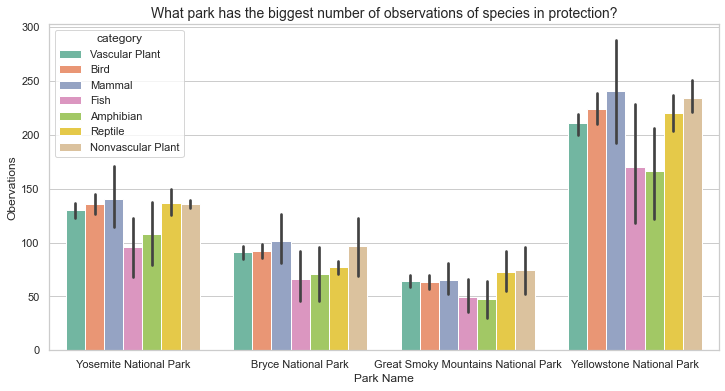

In [70]:
# Get the number of observations for each categories by park
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="park_name", y="observations", data=full_data[full_data.conservation_status != "No Intervention"], hue="category")
plt.title("What park has the biggest number of observations of species in protection?", fontsize=14)
ax.set_xlabel("Park Name", fontsize=12)
ax.set_ylabel("Obervations", fontsize=12)

### Statistical Significance
This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, we'll need to create a contingency table. 

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [23]:
# Create a contingency table for mammals vs. birds
contingency1 = [[30, 146], [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with reptiles. 

In [24]:
# Create a contingency table for mammals vs. reptiles
contingency2 = [[30, 146], [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

## Conclusion
- What is the percentage of protected vs unprotected species?
    - The percentage distribution of the dataset is 96.8% and 3.2% which means most of the data fall under 'No Protection'status.
- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation (5,362 vs 179). The biggest group in protection is Species of Concern declining to be in need of conservation.
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- What park has the biggest number of observations of species in protection?
    - Yellowstone park tends to comprise the most of protected observations.
    
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.